In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/sales.csv')

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Dtype

In [4]:
df.cost.dtype

dtype('O')

<font color='red'>Question:</font> What is **dtype** for? What does **dtype('O')** mean?

In [5]:
#dtype if for data type; dtype('O') means Pandas type object or Python type string

In [6]:
df.cost.head()

0    $333k
1      NaN
2    $270k
3      NaN
4     $97k
Name: cost, dtype: object

In [7]:
df.cost.count()

2216

In [8]:
len(df.cost)

3197

<font color='red'>Question:</font> What do "count" and "len" do? Why are their results different?

In [9]:
#"count" counts the number of non-null values, while "len" counts the number of all values, including null. So the result is different.

# 2. Transform strings to numerical values

## 2.1 Function

**Example:** A funcition which transform a string to a numerical value

In [10]:
def cost2num_long(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        x = x.strip('$') # remove the dollar sign in the front of the substring
        x = x.strip('k') # remove 'k' at the end of the substring
    return float(x)*1000 # multiply the number with 1000

**Example:** Test the function

In [11]:
cost2num_long('$10k')

10000.0

**Example:** A short version of this function

In [12]:
def cost2num(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: 
        x = x.strip('$').strip('k')
    return float(x)*1000

## 2.2 Use above function for data transformation

**Example**: Apply the function elementwise using **map**.

In [13]:
df.cost.map(cost2num).head()

0    333000.0
1         NaN
2    270000.0
3         NaN
4     97000.0
Name: cost, dtype: float64

**Example**: Assign the new **Series** to a variable

In [14]:
cost = df.cost.map(cost2num)

In [15]:
cost.head()

0    333000.0
1         NaN
2    270000.0
3         NaN
4     97000.0
Name: cost, dtype: float64

**Example**: Add the new **Series** to **DataFrame**

In [16]:
df['cost_num'] = df.cost.map(cost2num)

In [17]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,333000.0
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,NaN
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,270000.0
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,NaN
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,97000.0


**Example:** Change the values of this numerical column

In [18]:
(df.cost_num*2).head()

0    666000.0
1         NaN
2    540000.0
3         NaN
4    194000.0
Name: cost_num, dtype: float64

**Knowledge**: Please note that this piece of data we are playing with are only a copy of the column in the dataframe. The above operation doesn't change anything in the dataframe

In [19]:
df.cost_num.head()

0    333000.0
1         NaN
2    270000.0
3         NaN
4     97000.0
Name: cost_num, dtype: float64

# 3. Data Visualization

In [20]:
%matplotlib inline 

**Knowledge**: We are going to visualize data, matplotlib is built in pandas with this line, we don't need to import matplotlib explictly

**Example:** Visulizing distribution

<AxesSubplot:ylabel='Frequency'>

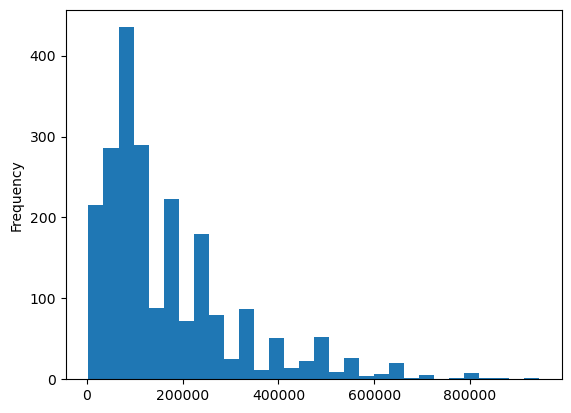

In [21]:
df.cost_num.plot(kind='hist', bins=30)

**Example**: log the **counts** to reveal more details

<AxesSubplot:ylabel='Frequency'>

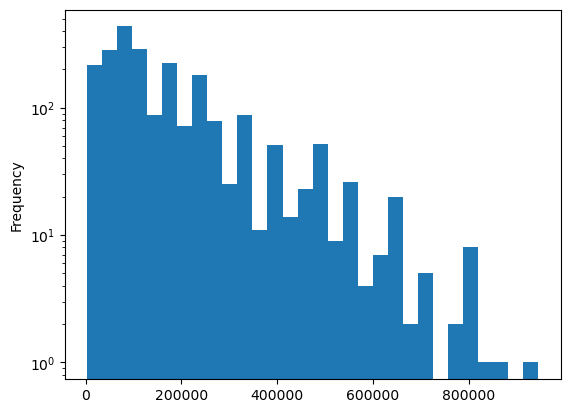

In [22]:
df.cost_num.plot(kind='hist', bins=30, log=True) 

**Example**: Log the **cost values** to remove the skewness

<AxesSubplot:ylabel='Frequency'>

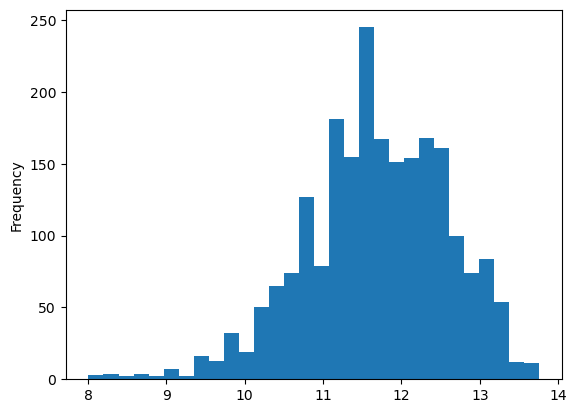

In [23]:
import numpy as np

df.cost_num.map(np.log).plot(kind='hist', bins=30)

<font color='red'>Question:</font> What is **log-normal distribution**?

In [24]:
#Log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.

<font color='red'>Assignment:</font> Transform **price**, **weight**, **height**, **width**, and **depth**; visualize their distributions

In [28]:
def price2num(x):
    """
    This function transform price string to numerical value.
    """
    if type(x) == str: 
        x = x.strip('$')
        x = x.replace(',','')
    return float(x)

In [29]:
df['price_num'] = df.price.map(price2num)

In [49]:
def weight2num(x):
    """
    This function transform weight string to numerical value.
    """
    if type(x) == str: 
        y = x.split(" Ton ")    
        return float(y[0]) * 1000 + float(y[1].replace(' Kg',''))
    else:
        return x

In [50]:
df['weight_num'] = df.weight.map(weight2num)

In [52]:
def height2num(x):
    """
    This function transform height string to numerical value.
    """
    if type(x) == str: 
        x = x.replace(' meters','')
    return float(x)

In [53]:
df['height_num'] = df.height.map(height2num)

In [58]:
def widthdepth2num(x):
    """
    This function transform width/depth string to numerical value.
    """
    if type(x) == str: 
        x = x.replace(' cm','')
    return float(x)

In [59]:
df['width_num'] = df.width.map(widthdepth2num)

In [60]:
df['depth_num'] = df.depth.map(widthdepth2num)

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

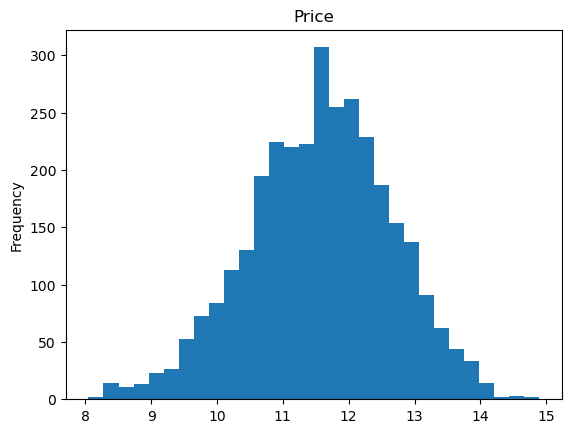

In [63]:
df.price_num.map(np.log).plot(kind='hist', bins=30, title='Price')

<AxesSubplot:title={'center':'Weight'}, ylabel='Frequency'>

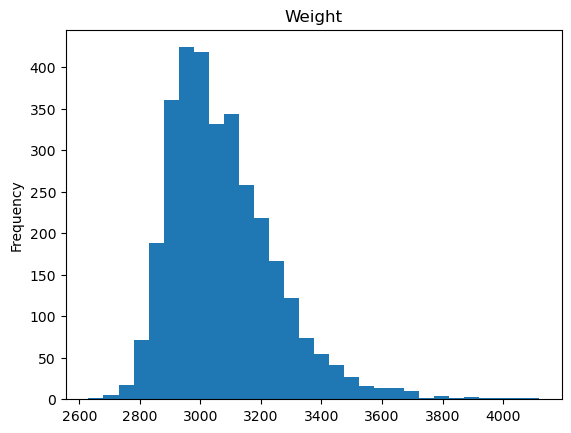

In [64]:
df.weight_num.plot(kind='hist', bins=30, title='Weight')

<AxesSubplot:title={'center':'Height'}, ylabel='Frequency'>

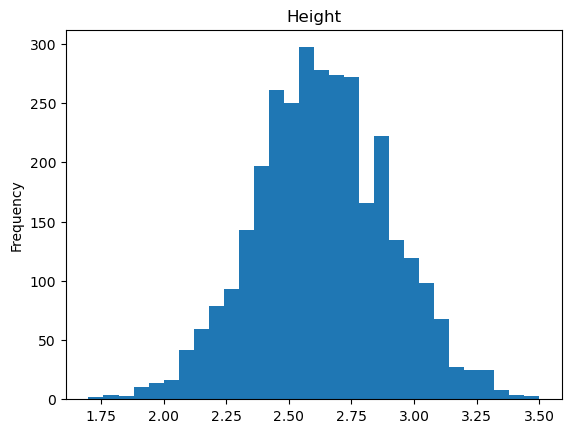

In [65]:
df.height_num.plot(kind='hist', bins=30, title='Height')

<AxesSubplot:title={'center':'Width'}, ylabel='Frequency'>

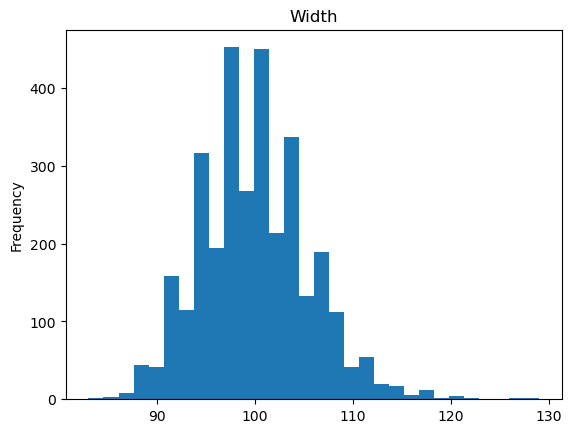

In [66]:
df.width_num.plot(kind='hist', bins=30, title='Width')

<AxesSubplot:title={'center':'Depth'}, ylabel='Frequency'>

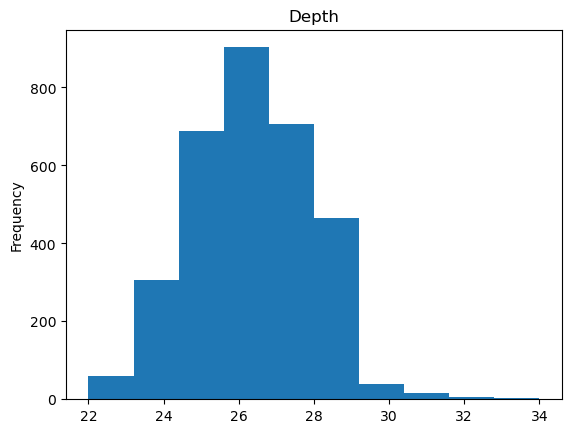

In [68]:
df.depth_num.plot(kind='hist', bins=10, title='Depth')